In [1]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
# Function with many minima
def yfunc(x):
    return x**2 + np.sin(8*x)

xbase = np.linspace(-2, 2, 100)
ybase = yfunc(xbase)
#plt.plot(xbase, ybase)
# plt.show()

# Part 1

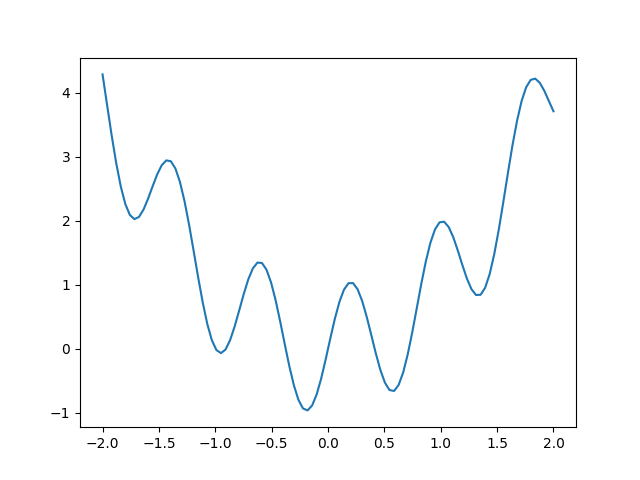

In [9]:
T=3
decayrate=0.95
bestcost=10000 
bestx=-2

rangemin, rangemax = -2, 2 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

def f1(f,T,decayrate,bestx,bestcost):
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        # print(f"Old x = {x}, delta = {dx}")
        y = f(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
            # print(f"New cost {y} worse than best so far: {bestcost}")
        T = T * decayrate
        return bestx,bestcost,T,x,y
def onestep(frame):
    global T,bestx,bestcost
    bestx,bestcost,T,x,y=f1(yfunc,T,decayrate,bestx,bestcost)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    lngood.set_data(bestx, bestcost)
    
ani= FuncAnimation(fig, onestep, frames=range(100), interval=100, repeat=False)
plt.show()

In [10]:
plt.close()

The f1() function takes as input the function to be optimized f, the current temperature T, the decay rate decayrate, the current best value bestx, and the current best cost bestcost. It generates a new value for the variable being adjusted and calculates the function's value at that value. If the new value results in a better cost than the previous best cost, it becomes the new best value and best cost. If the new cost is worse, it still may be accepted with a certain probability, which is determined by the temperature and the difference between the new and old costs. The temperature is then decreased according to the decay rate and the function returns the new best value, best cost, and temperature.

The onestep() function is called by the FuncAnimation() method to update the plot at each iteration of the optimization algorithm. It calls f1() to get the new best value, best cost, and temperature, adds the new value and cost to lists for plotting, and updates the plot with the new data.

The FuncAnimation() method creates the animation by repeatedly calling onestep() with a range of frames, an interval between frames, and a repeat flag. The resulting animation shows the progression of the optimization algorithm towards the minimum value of the given function.

# Part 2

Shortest path found: [34 42 50 15 30 25 86 84 12 57 38 60  8 78 67 73 96 11 37 70 79  1 81 44
 32 33 51 68 74 40 94 26  5 41  6 80 36 21  3 22 14 93 19 52 99 76 16 17
 28 64 18  7 27 65 39 95 63 72 92 49 75 82 46 98 85 10 35 77 91 20 83 66
  9 43 69 62 58 48 13 23  2 89  4  0 61 24 47 56 45 87 71 90 59 29 97 53
 31 55 54 88]
Length of shortest path: 128.526


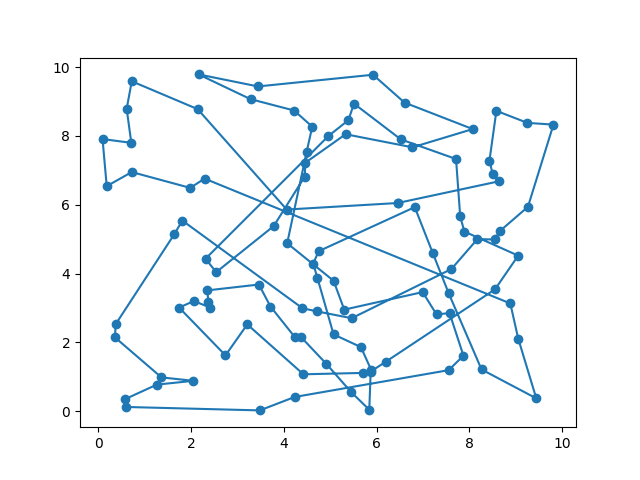

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import math
import random



filename="tsp_100.txt"
f=open(filename,"r")
p=f.readlines()

l=len(p)-1
c=[]
x=[]
y=[]
z=0
for line in p:
    if z==0:
        z=z+1
        continue
    p=line.split()
    d1=[]
    x.append(float(p[0]))
    y.append(float(p[1]))
    d1.append(float(p[0]))
    d1.append(float(p[1]))
    c.append(d1)

coords=np.array(c)
x=np.array(x)
y=np.array(y)

def tsp(coords, T, dr, ST,N):
    def path_dist(coords, path):
        distance = 0
        for i in range(len(path)-1):
            distance += math.dist(coords[path[i]], coords[path[i+1]])
        distance += math.dist(coords[path[-1]], coords[path[0]])
        return distance
    
    def AP(cost, new_cost, temp):
        if new_cost < cost:
            return 1.0
        else:
            return math.exp((cost - new_cost) / temp)
    
    n = coords.shape[0]

    path = np.arange(n)
    np.random.shuffle(path)

    best_path = path.copy()
    best_dist = path_dist(coords, path)

    current_path = path.copy()
    current_dist = best_dist

    i = 0
    # Main loop
    while T>=ST and i < N:
    
        new_path = current_path.copy()
        i1 = np.random.randint(0, n-1)
        i2 = np.random.randint(0, n-1)
        while i2 == i1:
            i2 = np.random.randint(0, n-1)
        new_path[i1], new_path[i2] = new_path[i2], new_path[i1]
   
        new_dist = path_dist(coords, new_path)
   
        ap = AP(current_dist, new_dist, T)
        if ap > random.random():
            current_path = new_path.copy()
            current_dist = new_dist
    
        if current_dist < best_dist:
            best_path = current_path.copy()
            best_dist = current_dist
  
        T =T * dr
        i=i + 1
    return best_path, best_dist

T = 30
dr = 0.99
ST = 1e-120
N = 1000000
best_path, best_dist = tsp(coords, T, dr, ST, N)
print(f"Shortest path found: {best_path}")
print(f"Length of shortest path: {best_dist:.3f}")

xplot = x[best_path] 
yplot = y[best_path]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.plot(xplot, yplot, 'o-')
plt.show()

The code reads coordinates of cities from a text file, and uses the simulated annealing algorithm to find the shortest path that visits all the cities and returns to the starting city.

The tsp function takes the following arguments:

coords: a numpy array of size n x 2 containing the coordinates of the n cities
T: initial temperature
dr: temperature decay rate
ST: a stopping threshold for the temperature
N: the number of iterations to run the algorithm
The path_dist function calculates the total distance of a given path that visits all the cities and returns to the starting city. The AP function computes the acceptance probability of a new solution based on the current solution, new solution, and current temperature.

The function tsp first initializes a random path and calculates the distance. It then performs the main loop, which generates a new path by swapping two cities and calculates its distance. The new path is accepted with a certain probability, based on the acceptance probability and a random number. The temperature is then reduced, and the loop continues until either the stopping threshold is reached or the maximum number of iterations is exceeded.

The code then plots the shortest path found and prints the indices of the cities in the order they should be visited